In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import b3d
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
import rerun as rr
import sys

sys.path.append(str(b3d.get_root_path()))

In [4]:
from tests.sama4d.video_to_tracks.registration import get_curated_single_patch_tracking_tasks
from tests.sama4d.video_to_tracks.solvers.twod.single_patch_tracker import SinglePatchTracker2D
tasks = get_curated_single_patch_tracking_tasks()
solver = SinglePatchTracker2D()

In [16]:
for (i, task) in enumerate(tasks):
    print(f"Task {i:02d}: {task}")
    rr.init(f"PT2D-{i:02d}-{task}")
    rr.connect("127.0.0.1:8812")
    task.visualize_task()
    spec = task.get_task_specification()
    solution = solver.solve(spec)
    metrics = task.score(solution)
    print(f"Metrics: {metrics}")
    task.visualize_solution(solution, metrics)
    rr.send_blueprint(task.rr_blueprint())

Task 00: KeypointTrackingTask[pan_through_plantroom.npz]()
Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)}
Task 01: KeypointTrackingTask[pan_through_plantroom.npz]()
Metrics: {'mean_distance_error': Array(57.832775, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)}
Task 02: KeypointTrackingTask[pan_through_plantroom.npz]()
Metrics: {'mean_distance_error': Array(1.6535362, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}
Task 03: KeypointTrackingTask[pan_through_plantroom.npz]()
Metrics: {'mean_distance_error': Array(1.8179318, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)}
Task 04: KeypointTrackingT

In [5]:
import os
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d--%H:%M")
folder_name = b3d.get_assets_path() / "test_results" / f"patch_tracking_{current_time}"
os.mkdir(folder_name)

In [6]:
folder_name

PosixPath('/home/georgematheos/b3d/assets/test_results/patch_tracking_2024-08-05--21:50')

In [7]:
# SAVE TO MP4
for (i, task) in enumerate(tasks):
    spec = task.get_task_specification()
    solver = SinglePatchTracker2D()
    solution = solver.solve(spec, log_to_self=True)
    metrics = task.score(solution)
    print(f"Metrics: {metrics}")
    solver.export_mp4(
        spec, task.keypoint_positions_2D,
        solution,
        folder_name / f"{i:02d}_"
    )

Metrics: {'mean_distance_error': Array(nan, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Metrics: {'mean_distance_error': Array(57.832775, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Metrics: {'mean_distance_error': Array(1.6535362, dtype=float32), 'n_errors_above_threshold_per_frame': Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)}


# Below here is scratch work

In [56]:
task = tasks[0]
solver = SinglePatchTracker2D()
spec = task.get_task_specification()
solution = solver.solve(spec, log_to_self=True)
task.export_2dpatchtracking_mp4(
    solution, solver.patch, solver.inferred_patches,
    solver.get_patches_over_time,
    ""
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
x = (solver.get_patches_over_time)

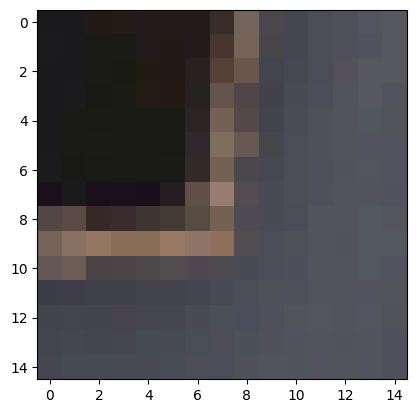

In [36]:
plt.imshow(solver.inferred_patches[9])

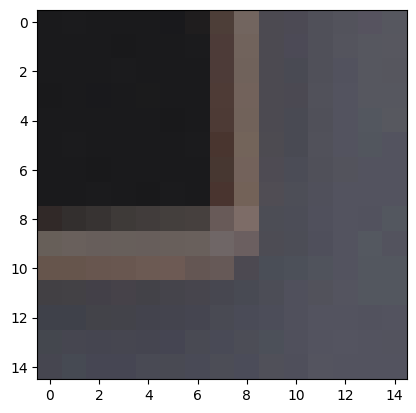

In [34]:
plt.imshow(solver.patch)